In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Input,Dense 
from tensorflow.keras.models import Model 

In [2]:
(xtrain,_),(xtest,_) = mnist.load_data()

In [6]:
xtrain = xtrain.astype('float32')/255.
xtest = xtest.astype('float32')/255.

In [8]:
xtest

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
#flatten the image
xtrain = xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))

In [13]:
encoding_dim = 32
input_img = Input(shape=(784,))

In [15]:
encoded  = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim,activation='relu')(encoded)

In [16]:
decoded = Dense(128, activation = 'relu')(encoded)
decoded = Dense(784,activation = 'sigmoid')(decoded)

In [17]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer = 'adam' , loss = 'binary_crossentropy')


In [20]:
autoencoder.fit(xtrain,xtrain,epochs=50,batch_size=256,shuffle=True,validation_data=(xtest,xtest))

Epoch 1/50

235/235 [==============================] - 6s 14ms/step - loss: 0.1288 - val_loss: 0.0042
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 6/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0039 - val_l

In [21]:
decoded_imgs = autoencoder.predict(xtest)

313/313 [==============================] - 1s 4ms/step


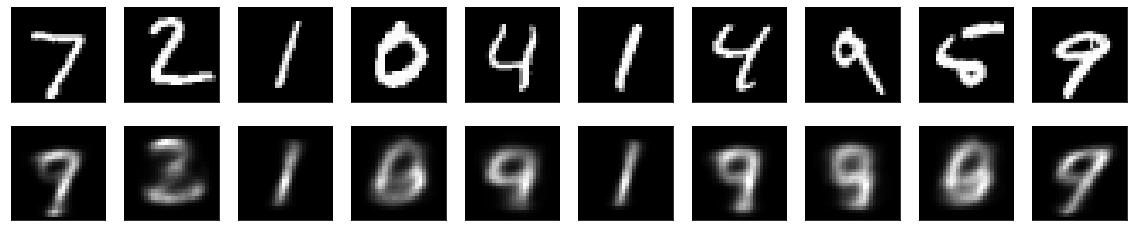

In [23]:
n =10
plt.figure(figsize=(20,4))
for i in range(n):
    #display the original images
    ax = plt.subplot(2,n,i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #display the reconstructed images
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()